<a href="https://colab.research.google.com/github/arjun-krishna1/car-fuel-efficiency/blob/main/fuel_efficiency_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Results
0. The most fuel efficient car would be an electric small station wagon with manual transmission and front wheel drive
  - According to this analysis
1. The average fuel range of cars has increased by 9% from 1984 to 2020.
2. The percentage of alternative fuel vehicles(electric, bio-fuel and etcetera) increased by 12% from 1984 to 2020.
  - This is likely one of the reasons that fuel economy is increasing with time.
  - The increasing popularity of alternative fuel vehicles is surprising as it is quite drastic.
3. The government incentives and metrics included in this dataset  (green house gases score and gas guzzler tax) correlate with fuel efficiency so they are effective metrics to measure fuel efficiency.
  - The feScore, ghgScore and guzzler Tax should deter people from wasteful vehicles and encourage them to use efficient ones
4. Tesla is the manufacturer with the highest average fuel range.


# Introduction
1. This is an analysis of a car fuel efficiency dataset
2. The goal of this analysis is to gain insights into what types of cars are most fuel efficient and use this information to design cars with better fuel efficiency
3. To do this we will be answering these questions: 
  - Which manufacturer produces the most fuel efficient fleet of cars?
  - What design features improve a car's fuel efficiency the most?
  - What are the trends in vehicle design over time?
3. Data Source: 'Datasets for All Model Years (1984–Present)' located at 'https://www.fueleconomy.gov/feg/epadata/vehicles.csv.zip'

# Summary of Results
1. Tesla is the manufacturer with the most fuel efficient fleet of cars
  - Tesla: 138 mpg
  - Average: 29 mpg
  - This is the range that a car can drive while using the same amount of energy
  - A Tesla can drive much further (100 miles further) per gallon than the average car
2. These are the best design choices to improve fuel efficiency:
  - Fuel: Electric
  - Transmission: Manual Transmission
  - Vehicle Type: Small station wagon
  - Engine and Transmission Layout: Front-wheel drive
1. Fuel economy has increased by 9% since 1984 to today
2. The percentage of alternative fuel vehicles, electric, hybrid and etcetera, has increased by 12%
3. Government incentives and metrics:
  - The fuel economy Score (feScore), and Greenhouse Gases Score (ghgScore) have a strong positively correlation and the guzzler tax has a weak negative correlation to UCity
  - This means that these government programs are doing their job well
  - The feScore, ghgScore and guzzler Tax should deter people from wasteful vehicles and encourage them to use efficient ones



## Load Data


In [ ]:
# Import data
import pandas as pd
url = "https://www.fueleconomy.gov/feg/epadata/vehicles.csv.zip"
raw_data = pd.read_csv(url)
print("Size: ", raw_data.shape)   

Size:  (43156, 83)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 1. Which manufacturer produces the most fuel efficient fleet of cars?
Tesla makes the most fuel efficient fleet of cars


## Introduction


## Assumptions
1. The manufacturer with the most fuel efficient fleet of cars is the one with the best average fuel economy across all of its models
2. Each model is produced in equal numbers
3. Miles driven in the city and on the highway are equal



## Which data matters for this?
1. UCity : City Miles per Gallon (MPG)
2. UHighway : Highway MPG
3. make : manufacturer

## Why do these properties matter?
1. The UCity and UHighway values will tell us the fuel economy of each car
2. The make will tell us which manufacturer mad it
3. We can use this information to find the average fuel economy of each manufacturer
4. This will tell us which manufacturer produces the most fuel-efficient fleet of cars

## Plan


1. Extract the needed columns and store in a new dataframe
2. Find the the names of all of the manufacturers
3. Find the average fuel economy of each manufacturer
4. Store the average fuel economy of each manufacturer with the manufacturer name
5. Find the manufacturer with the lowest fuel economy

## Code

In [ ]:
"""
0. Extract the needed columns and store in a new dataframe
"""
efficiency_data = raw_data.loc[:,["UCity", "UHighway","make"]]
efficiency_data.head()

,UCity,UHighway,make
0,23.3333,35.0000,Alfa Romeo
1,11.0000,19.0000,Ferrari
2,29.0000,47.0000,Dodge
3,12.2222,16.6667,Dodge
4,21.0000,32.0000,Subaru


In [ ]:
"""
1. Find the the names of all of the manufacturers
"""
makes = list(pd.unique(efficiency_data.loc[:,'make']))
# The number of manufactuers
len(makes)

138

In [ ]:
"""
Find the mean MPG of each manufacturer
"""
make_mpg = []

#Iterate through each row
for i in range(len(makes)):
  make = makes[i]
  models = raw_data[raw_data["make"]==make].loc[:, ["UCity", "UHighway"]]
  # print(models.loc[:,'UCity'].mean())
  # break
  make_mpg += [ (models.loc[:,'UCity'].mean()+ models.loc[:,'UHighway'].mean()) /2 ]


make_mpg = pd.DataFrame({"make": makes, "mean_MPG": make_mpg})

In [ ]:
make_mpg.head()

,make,mean_MPG
0,Alfa Romeo,29.996125
1,Ferrari,18.488925
2,Dodge,24.091642
3,Subaru,31.639623
4,Toyota,31.773677


In [ ]:
mpg_max = max(make_mpg.loc[:,"mean_MPG"])
make_max_list = make_mpg.loc[make_mpg["mean_MPG"]==mpg_max]
make_max = list(make_max_list["make"])[0]
make_max

'Tesla'

In [ ]:
make_max_list

,make,mean_MPG
111,Tesla,138.959813


In [ ]:
make_mpg.head()

,make,mean_MPG
0,Alfa Romeo,29.996125
1,Ferrari,18.488925
2,Dodge,24.091642
3,Subaru,31.639623
4,Toyota,31.773677


In [ ]:
print(make_max + " produces the most fuel efficient fleet.")
print(make_max + "'s average fuel range is " + str(round(mpg_max,2)) + " mpg.")
print("The average fuel range among all of the manufacturers is "+ str(round(make_mpg["mean_MPG"].mean(), 2)) + " mpg.")


Tesla produces the most fuel efficient fleet.
Tesla's average fuel range is 138.96 mpg.
The average fuel range among all of the manufacturers is 28.93 mpg.


In [ ]:
mpg_second = max(make_mpg[make_mpg["make"] != "Tesla"]["mean_MPG"])
make_second_list = make_mpg.loc[make_mpg['mean_MPG'] == mpg_second]
make_second = list(make_second_list["make"])[0]
make_second

'CODA Automotive'

In [ ]:
print(make_second + " produces the second most fuel efficient fleet.")
print(make_second + "'s average fuel range is " + str(round(mpg_second,2)) + " mpg.")
print("The average fuel range among all of the manufacturers is "+ str(round(make_mpg["mean_MPG"].mean(), 2)) + " mpg.")


CODA Automotive produces the second most fuel efficient fleet.
CODA Automotive's average fuel range is 103.65 mpg.
The average fuel range among all of the manufacturers is 28.65 mpg.


Trivial Check

In [ ]:
tesla = raw_data[raw_data["make"]=="Tesla"].loc[:, ["make", "UCity"]]#.head()
print(tesla.loc[:,"UCity"].mean())
raw_data[raw_data["make"]=="Tesla"].loc[:, ["make", "UCity"]].head()

138.7505154639175


,make,UCity
24783,Tesla,110.4
25681,Tesla,118.6
25682,Tesla,110.4
25953,Tesla,117.3
27223,Tesla,110.4


Most of Tesla's cars have a City MPG that is over 100, so it makes sense that their average is over 100

## Conclusion
1. The manufacturer Tesla produces the most fuel-efficient fleet of cars, as it has the highest average fuel range



# 2. Build a model to predict City MPG. Based on the model, how would you design a car that has the best possible City MPG

## Assumptions
1. If a car doesn't have an 'atvtype', type of alternative fuel or advanced technology, it is gasoline powered

## Plan


1. Prepare Data
2. Conduct Ridge Linear Regression


## Code

### Prepare Data
1. Remove properties that are confidently un-predictive
2. Fill missing data



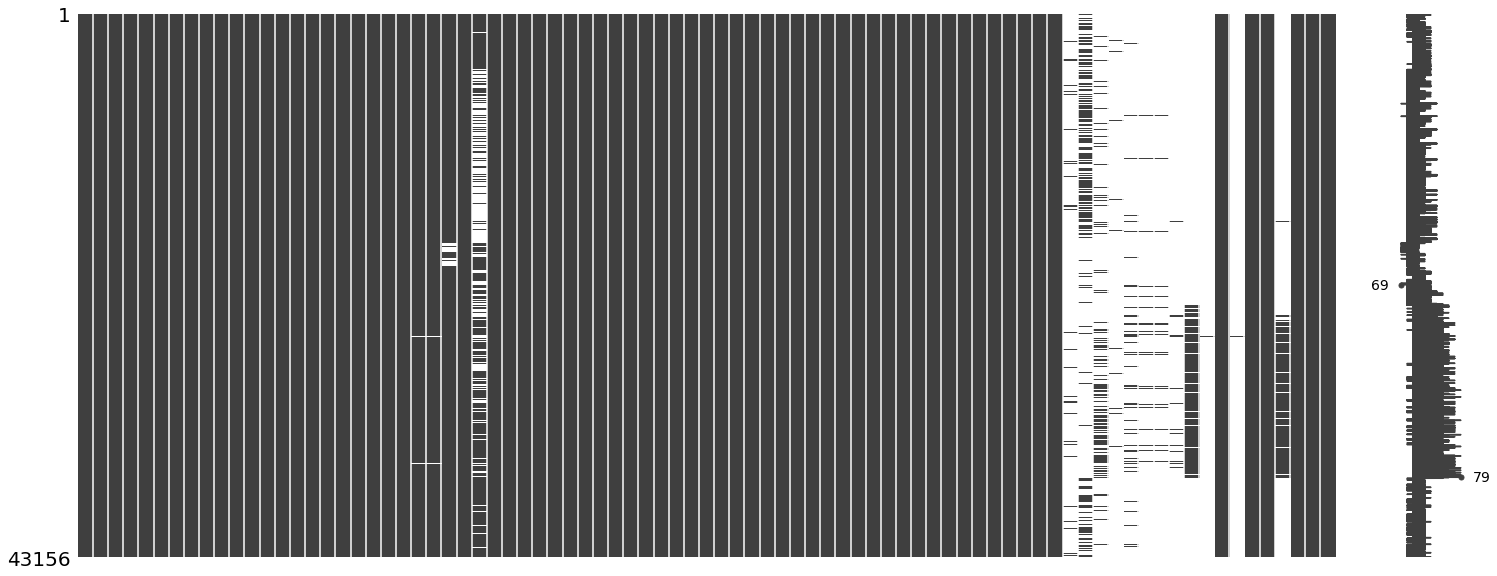

In [ ]:
"""
Visualze missing data
Look for patterns that could help meaningfully substitute data
"""
import missingno as msno
import matplotlib.pyplot as plt



"""
A column is a property in the dataset
A row is a specific data example
An white space means that a training example is missing
"""
msno.matrix(raw_data)

In [ ]:
raw_data.shape
raw_data.isnull().sum().sum()

477061

Some of the features are missing a lot of data; however, we might not need all of the features

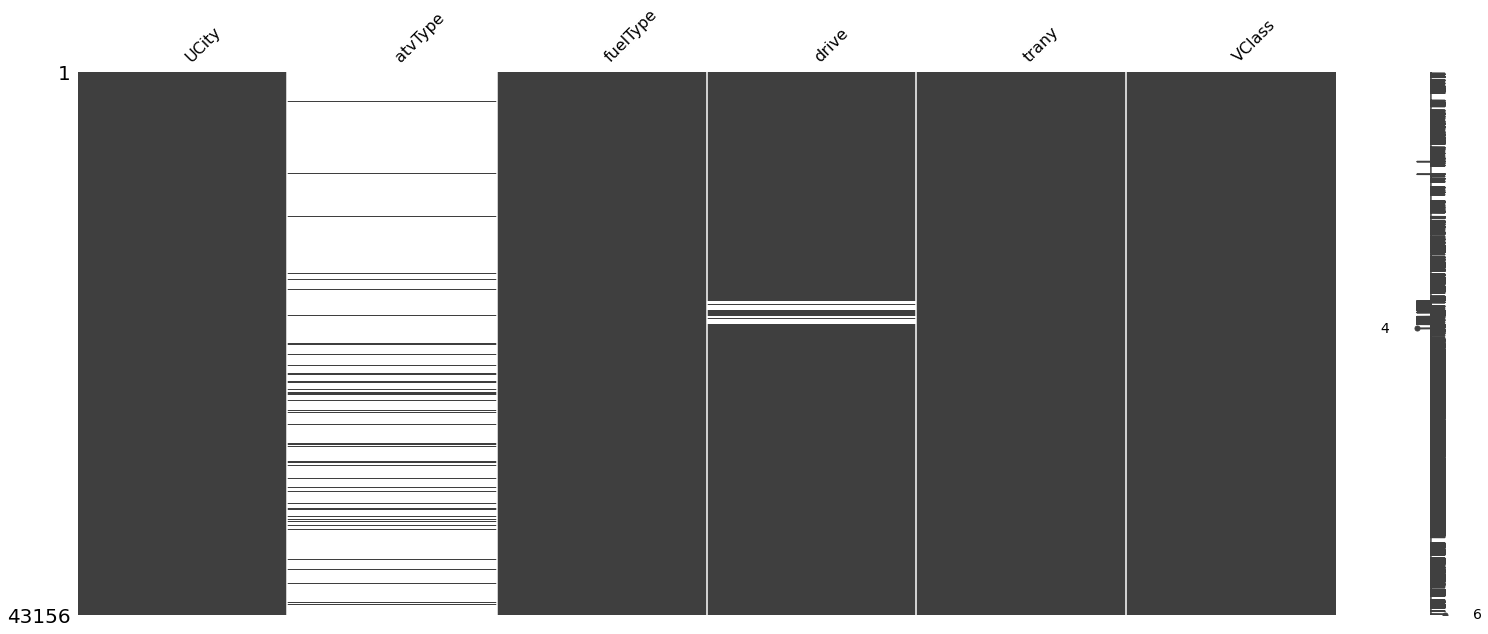

In [ ]:
# Get meaningful data
# params = ['UCity','atvType', 'createdOn', 'fuelType', 'drive', 'trany', 'city08', 'highway08', 'UHighway', 'VClass', 'co2TailpipeGpm', 'barrels08','guzzler']
# params = ['UCity','atvType', 'createdOn', 'fuelType', 'drive', 'trany', 'VClass', 'co2TailpipeGpm', 'barrels08','guzzler']
# params = ['UCity','atvType', 'fuelType', 'drive', 'trany', 'VClass', 'guzzler']
params = ['UCity','atvType', 'fuelType', 'drive', 'trany', 'VClass']
reg_data = raw_data.loc[:,params]
#Visualize data
msno.matrix(reg_data) 

The features that we want are still missing a lot of examples

In [ ]:
def replace_missing_values(dat):
  """
  Fill empty atvType values with gasoline and other parameter types with 0
  """
  dat['atvType'].fillna('gasoline', inplace=True)
  dat.fillna(0, inplace=True)
  return dat


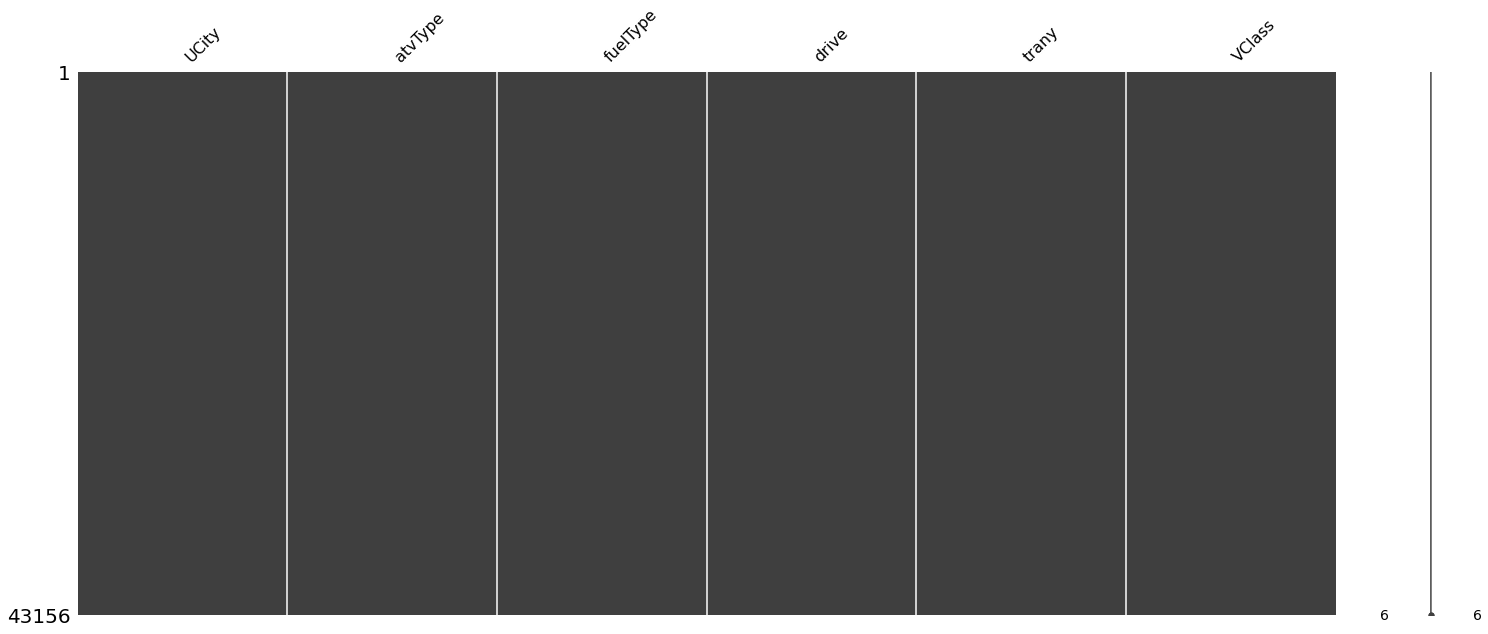

In [ ]:
reg_data = replace_missing_values(reg_data)
#Visualize data
msno.matrix(reg_data)

Due to our assumption, we can fill the atv type column

The rest we can fill with zero as that would interfere with the model the least

In [ ]:
from pandas.api.types import is_string_dtype

# Find features with string values
str_features = [col for col in reg_data.columns if is_string_dtype(reg_data[col])]
str_features

['atvType', 'fuelType', 'drive', 'trany', 'VClass']

In [ ]:
# Which features can be turned into integer values or simplified?
reg_data[str_features].nunique(axis=0)

atvType      9
fuelType    14
drive        8
trany       41
VClass      34
dtype: int64

Simpllifications:
- trany, as we only care if it is automatic or manual

In [ ]:
# Convert 'trany' column to Manual, Automatic, or 0
reg_data['trany'] = [str(i).split()[0] for i in reg_data['trany']]
reg_data['trany'].unique()

array(['Manual', 'Automatic', '0'], dtype=object)

In [ ]:
# Which features can be encoded (i.e. are categorical) ?
# Find features with string values
str_features = [col for col in reg_data.columns if is_string_dtype(reg_data[col])]
for feature in str_features:
  print(feature, " : " ,len(reg_data.loc[:,feature].unique()))
# They don't have many categories, so we can create dummy variables for them

atvType  :  9
fuelType  :  14
drive  :  8
trany  :  3
VClass  :  34


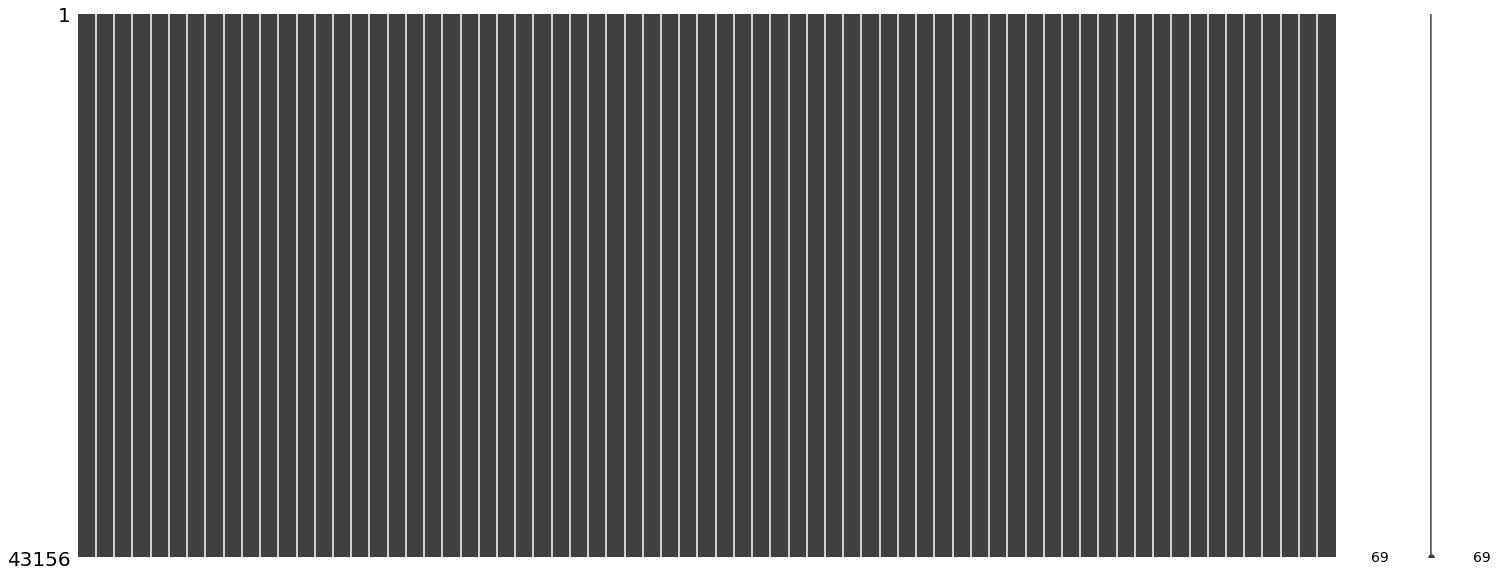

In [ ]:

# Loop through each categorical variable
for feature in str_features:
  #Change the data type of the column to categorical
  reg_data[feature] = pd.Categorical(reg_data[feature])
  #Create dummy variables
  dummies = pd.get_dummies(reg_data[feature], prefix = feature)
  #Add dummy variables to dataframe
  reg_data = pd.concat([reg_data, dummies], axis=1)
  #Drop the categorical parameter
  reg_data.drop([feature], axis=1, inplace=True)

#Visuallize data
msno.matrix(reg_data)

### Conduct Ridge Linear Regression

In [ ]:
#Get target variables and training data
y = reg_data.loc[:, 'UCity']
X = reg_data.drop(['UCity'], axis=1)

In [ ]:
from sklearn import linear_model
# Select a Ridge Regression model - Less susceptible to collinearity
reg = linear_model.Ridge(alpha=5)
reg.fit(X, y)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
# These are the weights
weights = list(reg.coef_)
#First ten weights
weights[:10]

[-10.648060201266215,
 -12.241009228469638,
 -9.57446611826037,
 -10.517846920307623,
 53.39889881415226,
 -10.653007825535424,
 8.045584438701086,
 2.9139237096580697,
 -10.724016668681754,
 -7.464054898609211]

In [ ]:
# Do a trivial check of the model
# The first example has a 'UCity' of 23.3333 mpg
print('The correct answer is '+str(round(y.loc[0],2))+' mpg')
print('Our answer is '+str(round(reg.predict([X.loc[0]])[0], 2))+' mpg')

The correct answer is 23.33 mpg
Our answer is 23.07 mpg


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
average_fuel_efficiency = sum(y)/len(y)
mean_absolute_error = mean_absolute_error(list(reg.predict(X)), list(y))

In [ ]:
# previous accuracy was 29%
error_percent = ((mean_absolute_error / average_fuel_efficiency)*100).round(2)
print(error_percent, '%')

15.09 %


## How would you design a car that has the best possible City MPG?


### Code

In [ ]:
# Associate the weights to their parameter name
# weights are the weights of this linear model
# name_param are the names of the parameters
param = pd.DataFrame(data = [weights], columns=X.columns).T
param = param.sort_values(by=[0])
param = param.T
param

,trany_0,atvType_Bifuel (LPG),fuelType_Gasoline or propane,atvType_gasoline,atvType_FFV,fuelType_Gasoline or natural gas,atvType_Bifuel (CNG),atvType_Diesel,atvType_CNG,fuelType_Premium and Electricity,fuelType_CNG,fuelType_Premium Gas or Electricity,fuelType_Premium,fuelType_Midgrade,fuelType_Premium or E85,fuelType_Gasoline or E85,fuelType_Regular,VClass_Minivan - 2WD,"VClass_Vans, Passenger Type",VClass_Standard Pickup Trucks,"VClass_Vans, Cargo Type",VClass_Standard Pickup Trucks 4WD,drive_2-Wheel Drive,VClass_Vans,VClass_Standard Sport Utility Vehicle 4WD,VClass_Standard Pickup Trucks/2wd,drive_Rear-Wheel Drive,drive_4-Wheel or All-Wheel Drive,VClass_Special Purpose Vehicle 4WD,VClass_Special Purpose Vehicles,VClass_Standard Pickup Trucks 2WD,VClass_Sport Utility Vehicle - 2WD,VClass_Special Purpose Vehicle 2WD,VClass_Midsize-Large Station Wagons,VClass_Vans Passenger,VClass_Small Pickup Trucks 4WD,VClass_Special Purpose Vehicles/4wd,VClass_Sport Utility Vehicle - 4WD,drive_0,VClass_Large Cars,VClass_Minivan - 4WD,VClass_Standard Sport Utility Vehicle 2WD,VClass_Special Purpose Vehicle,drive_4-Wheel Drive,drive_Part-time 4-Wheel Drive,VClass_Special Purpose Vehicles/2wd,VClass_Midsize Station Wagons,drive_All-Wheel Drive,fuelType_Diesel,VClass_Midsize Cars,VClass_Small Pickup Trucks 2WD,VClass_Two Seaters,VClass_Small Pickup Trucks,VClass_Small Sport Utility Vehicle 2WD,atvType_Plug-in Hybrid,VClass_Compact Cars,VClass_Subcompact Cars,VClass_Minicompact Cars,drive_Front-Wheel Drive,VClass_Small Sport Utility Vehicle 4WD,VClass_Small Station Wagons,fuelType_Regular Gas or Electricity,trany_Automatic,trany_Manual,atvType_Hybrid,fuelType_Regular Gas and Electricity,fuelType_Electricity,atvType_EV
0,-15.295872,-12.277323,-12.277323,-10.891343,-10.759015,-10.698691,-10.698691,-10.693715,-9.681535,-8.117873,-7.465832,-7.063705,-6.779857,-5.808687,-5.50421,-5.254805,-4.515581,-4.097992,-3.832033,-3.298266,-3.179458,-3.138661,-2.911498,-2.794397,-2.570425,-1.961663,-1.580248,-1.56891,-1.356495,-1.319547,-1.313412,-0.977573,-0.977561,-0.860074,-0.826605,-0.669763,-0.618825,-0.611652,-0.476635,-0.310633,-0.227539,-0.217992,0.187804,0.542428,0.752718,0.918039,1.188011,1.293075,1.918549,2.004672,2.528919,2.628684,2.748105,3.029668,3.037048,3.303653,3.779033,3.884334,3.949069,4.147678,4.811967,5.514063,6.959291,8.336581,8.615185,12.704563,53.349389,53.349389


<Figure size 432x288 with 0 Axes>

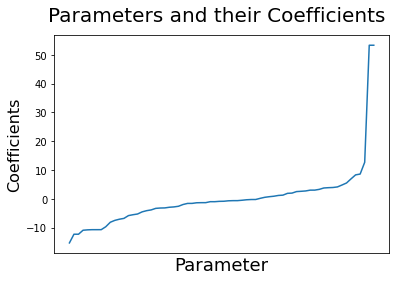

In [ ]:
# Initialize plot
fig = plt.figure()
fig, ax = plt.subplots()

#Use the parameter names as x-values and the parameter values as y values
plt.plot(list(param.columns), param.T)

# Set aesthetics
fig.suptitle('Parameters and their Coefficients', fontsize=20)
ax.get_xaxis().set_ticks([])
plt.xlabel('Parameter', fontsize=18)
plt.ylabel('Coefficients', fontsize=16)
plt.show()

In [ ]:
#Electricity has the highest weight with Gas/Electric Hybrid next for fuelType
cols_fuel = param.columns
cols_fuel = [i for i in cols_fuel if i.split(sep="_")[0] == 'fuelType']
param[cols_fuel]

,fuelType_Gasoline or propane,fuelType_Gasoline or natural gas,fuelType_Premium and Electricity,fuelType_CNG,fuelType_Premium Gas or Electricity,fuelType_Premium,fuelType_Midgrade,fuelType_Premium or E85,fuelType_Gasoline or E85,fuelType_Regular,fuelType_Diesel,fuelType_Regular Gas or Electricity,fuelType_Regular Gas and Electricity,fuelType_Electricity
0,-12.277323,-10.698691,-8.117873,-7.465832,-7.063705,-6.779857,-5.808687,-5.50421,-5.254805,-4.515581,1.918549,5.514063,12.704563,53.349389


In [ ]:
#Manual transmission is to be preffered over automatic, but only by a little bit
cols_trany = [i for i in param.columns if i.split(sep="_")[0] == 'trany']
param[cols_trany]

,trany_0,trany_Automatic,trany_Manual
0,-15.295872,6.959291,8.336581


In [ ]:
#Electric Vehicles are the best atvType, then Hybrid
cols_atv = param.columns
cols_atv = [i for i in cols_atv if i.split(sep="_")[0] == 'atvType']
param[cols_atv]

,atvType_Bifuel (LPG),atvType_gasoline,atvType_FFV,atvType_Bifuel (CNG),atvType_Diesel,atvType_CNG,atvType_Plug-in Hybrid,atvType_Hybrid,atvType_EV
0,-12.277323,-10.891343,-10.759015,-10.698691,-10.693715,-9.681535,3.037048,8.615185,53.349389


In [ ]:
#Small Station Wagons are the best Vehicle Class
cols_size = param.columns
cols_size = [i for i in cols_size if i.split(sep="_")[0] == 'VClass']
param[cols_size]

,VClass_Minivan - 2WD,"VClass_Vans, Passenger Type",VClass_Standard Pickup Trucks,"VClass_Vans, Cargo Type",VClass_Standard Pickup Trucks 4WD,VClass_Vans,VClass_Standard Sport Utility Vehicle 4WD,VClass_Standard Pickup Trucks/2wd,VClass_Special Purpose Vehicle 4WD,VClass_Special Purpose Vehicles,VClass_Standard Pickup Trucks 2WD,VClass_Sport Utility Vehicle - 2WD,VClass_Special Purpose Vehicle 2WD,VClass_Midsize-Large Station Wagons,VClass_Vans Passenger,VClass_Small Pickup Trucks 4WD,VClass_Special Purpose Vehicles/4wd,VClass_Sport Utility Vehicle - 4WD,VClass_Large Cars,VClass_Minivan - 4WD,VClass_Standard Sport Utility Vehicle 2WD,VClass_Special Purpose Vehicle,VClass_Special Purpose Vehicles/2wd,VClass_Midsize Station Wagons,VClass_Midsize Cars,VClass_Small Pickup Trucks 2WD,VClass_Two Seaters,VClass_Small Pickup Trucks,VClass_Small Sport Utility Vehicle 2WD,VClass_Compact Cars,VClass_Subcompact Cars,VClass_Minicompact Cars,VClass_Small Sport Utility Vehicle 4WD,VClass_Small Station Wagons
0,-4.097992,-3.832033,-3.298266,-3.179458,-3.138661,-2.794397,-2.570425,-1.961663,-1.356495,-1.319547,-1.313412,-0.977573,-0.977561,-0.860074,-0.826605,-0.669763,-0.618825,-0.611652,-0.310633,-0.227539,-0.217992,0.187804,0.918039,1.188011,2.004672,2.528919,2.628684,2.748105,3.029668,3.303653,3.779033,3.884334,4.147678,4.811967


In [ ]:
#Front-Wheel Drive is the best engine and transmission layout
cols_drive = param.columns
cols_drive = [i for i in cols_drive if i.split(sep="_")[0] == 'drive']
param[cols_drive]

,drive_2-Wheel Drive,drive_Rear-Wheel Drive,drive_4-Wheel or All-Wheel Drive,drive_0,drive_4-Wheel Drive,drive_Part-time 4-Wheel Drive,drive_All-Wheel Drive,drive_Front-Wheel Drive
0,-2.911498,-1.580248,-1.56891,-0.476635,0.542428,0.752718,1.293075,3.949069


## Conclusion
Based on the linear model and correlation analysis, this is how I would design my car: 
1. Fuel: Electric
  - Electricity has the most positive weight out of all of the fuelTypes', at 53.25
  - EV (Electric Vehicle) has a weight of 53, which is the highest out of all of the atvType's
2. Transmission: Manual
  - Manual's weight is 8.4, about 1.4 higher than automatic
3. Vehicle Type: Small Station Wagon
  - This vehicle type has the most positive weight out of them all, at 4.82
3. Engine and Transmission Layout: Front-Wheel Drive
  - Front-Wheel Drive is more positive then all of the others in its category , at 3.96



# 3. How has fuel economy changed over time? What other trends or insights can you find in the data?

## Plan
1. Convert the 'createdOn' data to numeric values
2. Find the mean of 'UCity' for each year
3. Plot, and find the change

## Code

In [ ]:

# Create a helper function
import datetime

def convert_string_to_ordinal(i, f = "%b %d %Y"):
  #Take out date components from string
  i_month_date = i.split()[1:3]
  i_year = [i.split()[-1]]

  #Convert to a more understandable string
  i_parse = " ".join( i_month_date + i_year)

  #Convert to datetime
  i_datetime = datetime.datetime.strptime(i_parse, f)
  return i_datetime.toordinal()


In [ ]:
# Copy certain columns and fill in empty values
time_data = replace_missing_values(raw_data.loc[:,["UCity", "createdOn", "atvType"]])

#OneHotEncode atvType column

feature='atvType'
#Change the data type of the column to categorical
time_data[feature] = pd.Categorical(time_data[feature])
#Create dummy variables
dummies = pd.get_dummies(time_data[feature], prefix = feature)
#Add dummy variables to dataframe
time_data = pd.concat([time_data, dummies], axis=1)
#Drop the categorical parameter
time_data.drop([feature], axis=1, inplace=True)

# Convert dates to ordinal dates ( number of days since the year zero) 
time_data['createdOn'] = [convert_string_to_ordinal(i) for i in time_data['createdOn']]

In [ ]:
time_data.head()

,UCity,createdOn,atvType_Bifuel (CNG),atvType_Bifuel (LPG),atvType_CNG,atvType_Diesel,atvType_EV,atvType_FFV,atvType_Hybrid,atvType_Plug-in Hybrid,atvType_gasoline
0,23.3333,734869,0,0,0,0,0,0,0,0,1
1,11.0000,734869,0,0,0,0,0,0,0,0,1
2,29.0000,734869,0,0,0,0,0,0,0,0,1
3,12.2222,734869,0,0,0,0,0,0,0,0,1
4,21.0000,734869,0,0,0,0,0,0,0,0,1


In [ ]:
# Find the average fuel of all the models registered for each date
UCity_mean = [];
# Loop through each unique day
for d in time_data.loc[:, "createdOn"].unique():
  #Find all of the entries created on d
  this_day = time_data[ time_data["createdOn"] == d].loc[:, ["createdOn"]]

  # Make the location of that day in time_data a seperate column
  this_day.reset_index(level=0, inplace=True)

  ind = this_day.loc[:,'index']
  UCity_mean += [time_data.loc[ind,"UCity"].mean()]

UCity_mean = pd.DataFrame({"createdOn":list(time_data.loc[:, "createdOn"].unique()), "UCity_mean":UCity_mean})

In [ ]:
UCity_mean.head()

,createdOn,UCity_mean
0,734869,21.995809
1,735170,21.341197
2,735176,28.976108
3,735179,31.914500
4,735191,23.099914


Text(0, 0.5, 'fuel economy')

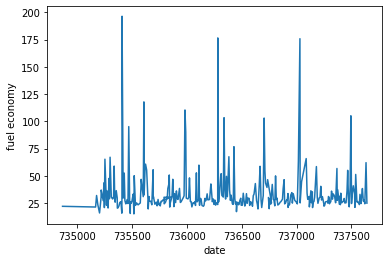

In [ ]:
#Graph the  as a function of time
fig, ax = plt.subplots()  # Create a figure containing a single axes.
# len(UCity_mean) == len(time_data.loc[:, "createdOn"].unique())
ax.plot(time_data.loc[:, "createdOn"].unique(), UCity_mean.loc[:,"UCity_mean"])
ax.set_xlabel('date')
ax.set_ylabel('fuel economy')
# This graph is focused to much on the small spikes, we need the overall trend

In [ ]:
# Get the average fuel economy for each year
unq = time_data.loc[:, "createdOn"].unique()
UCity_mean_year = []
first_day_year = []
#L
for y in range(min(unq), max(unq), 365):
  #Find all of the entries created in between this year and the next
  this_year = UCity_mean[ (y <= UCity_mean['createdOn']) &  (UCity_mean['createdOn'] < y+365)].iloc[:, [1]]
  this_year
  # Make the location of that year in time_data a seperate column
  this_year.reset_index(level=0, inplace=True)

  ind = this_year.loc[:,'index']
  UCity_mean_year += [UCity_mean.loc[ind,"UCity_mean"].mean()]
  first_day_year += [y]

first_day_year = [ int((datetime.date.fromordinal(year)).year) for year in first_day_year]
UCity_mean_year = pd.DataFrame({'createdOn':first_day_year, 'UCity_mean': UCity_mean_year})


In [ ]:
UCity_mean_year

,createdOn,UCity_mean
0,2013,26.283478
1,2014,34.847082
2,2015,33.111146
3,2016,37.318872
4,2016,32.239279
5,2017,36.507269
6,2018,30.787632
7,2019,34.363759


In [ ]:
# Gas mileage increased by 9.15%
per = UCity_mean_year.loc[len(UCity_mean_year)-1,'UCity_mean'] - UCity_mean_year.loc[0,'UCity_mean']
print("City gas mileage changed by "+ str(per.round()) + "%")

City gas mileage changed by 8.0%


Text(0, 0.5, 'Average fuel economy(MPG)')

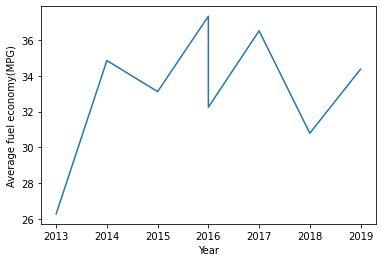

In [ ]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.

# len(avg) == len(time_data.loc[:, "createdOn"].unique())

# ax.plot(?[ int((datetime.date.fromordinal(year)).year) for year in years], avg_year)
ax.plot(UCity_mean_year["createdOn"], UCity_mean_year["UCity_mean"])
ax.set_xlabel('Year')
ax.set_ylabel('Average fuel economy(MPG)')
# avg

# From this graph we can see that fuel economy increased over time

In [ ]:
# Find the percent of gasoline vehicles docs
gasoline_percent = []
for d in time_data.loc[:, "createdOn"].unique():
  #Find all of the entries created on d
  this_day = time_data[ time_data["createdOn"] == d].loc[:, ["createdOn"]]
  # this_day
  this_day.reset_index(level=0, inplace=True)
  ind = this_day.loc[:,'index']
  gasoline_percent += [time_data.loc[ind,"atvType_gasoline"].mean()]

gasoline_percent = pd.DataFrame({'createdOn':time_data.loc[:, "createdOn"].unique(), 'gasoline_percent': gasoline_percent})
# gasoline_percent = gasoline_percent.T



In [ ]:
gasoline_percent.head()

,createdOn,gasoline_percent
0,734869,0.926265
1,735170,0.586207
2,735176,0.840000
3,735179,1.000000
4,735191,1.000000


In [ ]:
# Get the average number of gasoline vehicles
unq = time_data.loc[:, "createdOn"].unique()
gasoline_percent_year = []
first_day_year = []
#L
for y in range(min(unq), max(unq), 365):
  #Find all of the entries created in between this year and the next
  this_year = gasoline_percent[ (y <= gasoline_percent['createdOn']) &  (gasoline_percent['createdOn'] < y+365)].iloc[:, [1]]

  # Make the location of that year in time_data a seperate column
  this_year.reset_index(level=0, inplace=True)

  ind = this_year.loc[:,'index']
  gasoline_percent_year += [gasoline_percent.loc[ind,"gasoline_percent"].mean()*100]
  first_day_year += [y]


year = [int((datetime.date.fromordinal(year)).year) for year in first_day_year]
gasoline_percent_year = pd.DataFrame({'createdOn':year, 'gasoline_percent_year': gasoline_percent_year})




In [ ]:
gasoline_percent_year.head()

,createdOn,gasoline_percent_year
0,2013,87.899485
1,2014,72.836302
2,2015,80.809536
3,2016,75.436649
4,2016,85.178200


Text(0, 0.5, '% vehicles using gasoline')

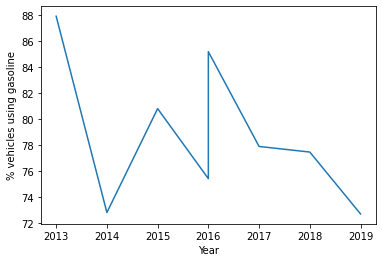

In [ ]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.

# len(avg) == len(time_data.loc[:, "createdOn"].unique())

# ax.plot([ int((datetime.date.fromordinal(year)).year) for year in years], avg_year)
ax.plot(gasoline_percent_year["createdOn"], gasoline_percent_year["gasoline_percent_year"])
ax.set_xlabel('Year')
ax.set_ylabel('% vehicles using gasoline')
# avg

# From this graph we can see that fuel economy increased over time

In [ ]:
# Percentage of gasoline vehicles fell by 11.79%
per = gasoline_percent_year.loc[len(gasoline_percent_year)-1,'gasoline_percent_year'] - gasoline_percent_year.loc[0,'gasoline_percent_year']
print("The percent of vehicles that used gasoline as their only fuel type changed by "+ str(per.round())+ "%")

The percent of vehicles that used gasoline as their only fuel type changed by -15.0%


### Correlation Analysis

In [ ]:
# Convert 'guzzler' to a boolean expressing if they have to pay the gas-guzzler tax
raw_data['guzzler'] = [ 1 if (a =='G' or a== 'T') else 0 for a in raw_data['guzzler'] ]
raw_data['guzzler'].unique()

array([0, 1])

In [ ]:
# Correlation analysis
# Find the correlation between all of the parameters
corr_data = raw_data.loc[:,['UCity', "guzzler","feScore", "ghgScore"]]
corr = corr_data.corr()
# Keep the correlation between UCity and the other parameters and turn it into
# a dictionary
# corr = dict(corr.loc['UCity'])
corr

,UCity,guzzler,feScore,ghgScore
UCity,1.000000,-0.174867,0.430198,0.429432
guzzler,-0.174867,1.000000,-0.062185,-0.062097
feScore,0.430198,-0.062185,1.000000,0.999096
ghgScore,0.429432,-0.062097,0.999096,1.000000


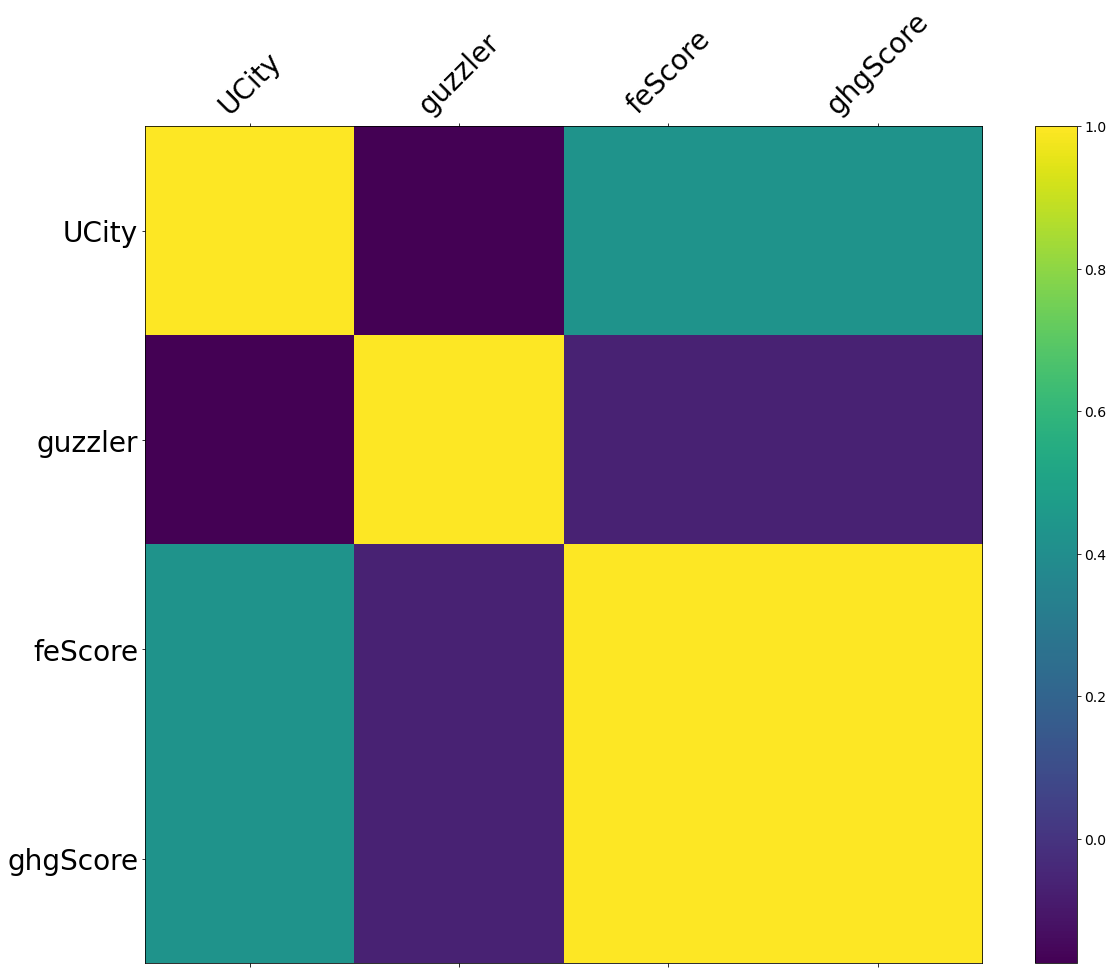

In [ ]:
# Put the coorelation in a dataframe
# corr = pd.DataFrame(data=[max_val], columns=max_id)
# plt.matshow(corr)
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_data.corr(), fignum=f.number)
plt.xticks(range(corr_data.shape[1]), corr_data.columns, fontsize=28, rotation=45)
plt.yticks(range(corr_data.shape[1]), corr_data.columns, fontsize=28)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

Highly correlated with UCity:
feScore, ghgScore
Negatively correlated with UCity:
guzzler

## Conclusion
1. Fuel range increased with time
  - 9% over the period of this data
2. The percentage of alternative fuel vehicles increased
  - Increased by 12%
  - This could be one of the reasons that fuel economy is increasing with time
  - The increasing popularity of alternative fuel vehicles is surprising
  
3. Government incentives and metrics:
  - The fuel economy Score (feScore), and Greenhouse Gases Score (ghgScore) have a strong positively correlation and the guzzler tax has a weak negative correlation to UCity
  - This means that these government programs are doing their job well
  - The feScore, ghgScore and guzzler Tax should deter people from wasteful vehicles and encourage them to use efficient ones
